In [1]:
import numpy as np
import sympy as sp

In [15]:
x, y, w, b = sp.symbols('x y w b')

In [72]:
sigmoid = 1 / (1 + sp.exp(-x))

In [73]:
sigmoid

1/(1 + exp(-x))

In [74]:
sp.diff(sigmoid)

exp(-x)/(1 + exp(-x))**2

In [79]:
sp.Sum(sigmoid, (x, 1, 10)) / 10

Sum(1/(1 + exp(-x)), (x, 1, 10))/10

In [637]:

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
        self.gradient = (self.input_ > 0) * output_gradient
        return self.gradient

class MSE:
    
    def __init__(self):
        pass
    
    def __call__(self, y_hat, y):
        self.y_hat = y_hat
        self.y = y
        return 1 / len(y_hat) * np.sum((y_hat - y)**2)

    def backward(self):
        self.gradient = 2 * (self.y - self.y_hat) / len(self.y) 
        self.gradient = self.gradient.reshape(-1,1)
        return self.gradient

class Linear:
    
    def __init__(self, num_input, num_output):
        self.W = np.random.randn(num_input, num_output)
        self.b = np.random.randn(num_output)
        
    def __call__(self, X):
        self.X = X
        return X.dot(self.W) + self.b
    
    def backward(self, gradient):
    
        self.dW = self.X.T.dot(gradient)
        self.dX = gradient.dot(self.W.T)
        self.db = gradient.sum()
        return self.dX

class Sigmoid:
    
    def __init__(self):
        pass
    
    def __call__(self, X):
        self.X = X
        return 1 / (1 + np.exp(-X))

    def backward(self, gradient):
        self.gradient = (np.exp( - self.X) / (1  + np.exp(-self.X))**2) * gradient
        return self.gradient
    
class LinearRegression:
    
    def __init__(self, in_features, out_features):
        
        self.fc1 = Linear(in_features, 100)
        self.fc2 = Linear(100, out_features)
        self.relu = Sigmoid()
        self.loss = MSE()
    
    def forward(self, X):
        
        x = self.fc1(X)
        x = self.relu(x)
        self.y_hat = self.fc2(x)
        
        return
    
    def update(self, X, y, lr = 0.0001):
        
        self.forward(X)
        loss = self.loss(y, self.y_hat)
        gradient = self.loss.backward()
        gradient = self.fc2.backward(gradient)
        gradient = self.relu.backward(gradient)
        self.fc1.backward(gradient)
        self.fc1.b -= self.fc1.db * lr
        self.fc1.W -= self.fc1.dW * lr
        self.fc2.b -= self.fc2.db * lr
        self.fc2.W -= self.fc2.dW * lr
        

In [638]:
W_true = np.array([2.]).reshape(1,1)
b_true = np.array([[4]])

In [639]:
x = np.linspace(1,10,100).reshape(-1,1)

In [640]:
x.shape

(100, 1)

In [641]:
y = x.dot(W_true) + b_true

In [642]:
import matplotlib.pyplot as plt

In [643]:
lr = LinearRegression(1,1)

In [644]:
lr.forward(x)

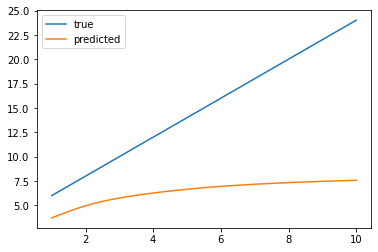

In [645]:
plt.plot(x,y, label = 'true')
plt.plot(x,lr.y_hat, label = 'predicted')
plt.legend()

In [646]:
print('before {}'.format(MSE()(y, lr.y_hat)))
lr.update(x,y)
lr.forward(x)
print('after {}'.format(MSE()(y, lr.y_hat)))

before 91.41838986242034
after 89.3359725626519


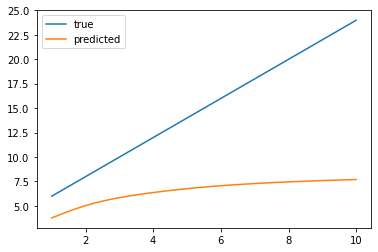

In [647]:
plt.plot(x,y, label = 'true')
plt.plot(x,lr.y_hat, label = 'predicted')
plt.legend()

In [648]:
x_squared = x**2
y = x_squared.dot(W_true) + b_true

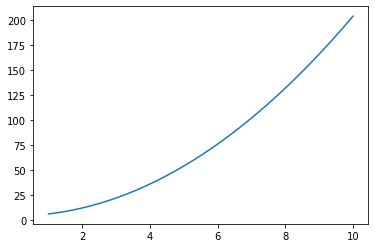

In [649]:
plt.plot(x,y)

In [ ]:
plt.figure(figsize = (15,10))
lr = LinearRegression(1,1)
plt.plot(x,y, label = 'True')
for i in range(1000001):
    
    lr.forward(x)
    lr.update(x,y)
    if i % 50000 == 0:
        print('Error at after {} epoch is {}'.format(i, MSE()(y, lr.y_hat)))
        plt.plot(x, lr.y_hat, label = '{} epoch'.format(i))

plt.legend()
plt.show()

Error at after 0 epoch is 8281.597136174554
Error at after 50000 epoch is 0.5601602385993756
Error at after 100000 epoch is 0.22891486347868878
